<a href="https://colab.research.google.com/github/WesleyAldridge/HW2_MachineLearning/blob/master/HW2_MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## HW2 - Convolutional Neural Network For CIFAR10 Data Set

####Instructions from professor:

"The goal of this homework is to create a convolutional neural network for the CIFAR10 data set.

Make sure that the data is divided into:

- training set,
- validation set
- test set.

Use the training set to train your neural networks. Evaluate their performance on the validation data set.

After trying several different architectures, choose the one that performs best of the validation set.

Train this final architecture on the data from the training set and validation set and evaluate its performance on the test set."

## Loading the CIFAR10 data set

In [3]:
from keras.datasets import cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170500096/170498071 [==============================] - 64s 0us/step


## Exploring the format of the CIFAR10 data set

In [4]:
train_images.shape

(50000, 32, 32, 3)

In [5]:
len(train_images)

50000

In [6]:
train_images.ndim

4

In [7]:
train_images.dtype

dtype('uint8')

In [8]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [9]:
train_labels.shape

(50000, 1)

In [10]:
len(train_labels)

50000

## Displaying CIFAR10 images

In [0]:
class_names = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [0]:
import matplotlib.pyplot as plt

In [0]:
index = 0
image = train_images[index]

In [14]:
image.shape

(32, 32, 3)

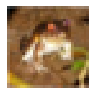

In [15]:
plt.figure(figsize=(1.5, 1.5))
plt.grid(None)
plt.xticks([])
plt.yticks([])
plt.imshow(image)
plt.show()

In [16]:
label = train_labels[index, 0]
label

6

In [17]:
class_names[label]

'frog'

In [0]:
table = [[] for _ in range(10)]
for i in range(len(train_images)):
  label = train_labels[i, 0]
  table[label].append(i)

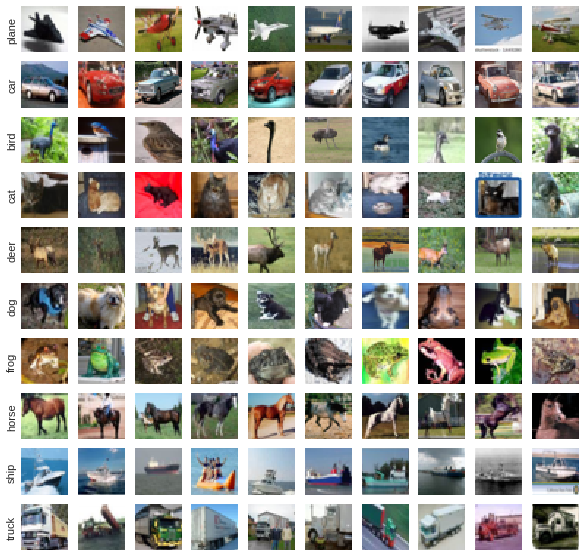

In [20]:
plt.figure(figsize=(10,10))
for class_index in range(10):
  for example_index in range(10):
    plt.subplot(10, 10, class_index * 10 + example_index + 1)
    plt.xticks([])
    plt.yticks([])
    if example_index == 0:
      plt.ylabel(class_names[class_index], rotation=90)
    plt.grid(False)
    plt.imshow(train_images[table[class_index][example_index]], cmap=plt.cm.binary)
plt.show()

## Making CNN